In [45]:
from pyspark.sql import SparkSession

In [46]:
# Initialize a Spark session
spark = SparkSession.builder.appName("EV_Analysis").getOrCreate()

In [47]:
# Load the CSV file
ev_data = spark.read.csv(r'C:\Users\jsheu\Downloads\Electric_Vehicle_Population_Data.csv', header=True, inferSchema=True)

In [48]:
# Show the first few rows
ev_data.show(5)

+----------+---------+---------+-----+-----------+----------+-------+--------+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+--------------------+--------------------+-----------------+
|VIN (1-10)|   County|     City|State|Postal Code|Model Year|   Make|   Model|Electric Vehicle Type|Clean Alternative Fuel Vehicle (CAFV) Eligibility|Electric Range|Base MSRP|Legislative District|DOL Vehicle ID|    Vehicle Location|    Electric Utility|2020 Census Tract|
+----------+---------+---------+-----+-----------+----------+-------+--------+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+--------------------+--------------------+-----------------+
|5UXTA6C0XM|   Kitsap|  Seabeck|   WA|      98380|      2021|    BMW|      X5| Plug-in Hybrid El...|                             Clean Alternative...|            30|        0|         

In [49]:
# Display basic information about the dataset
ev_data.printSchema()

root
 |-- VIN (1-10): string (nullable = true)
 |-- County: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Postal Code: integer (nullable = true)
 |-- Model Year: integer (nullable = true)
 |-- Make: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Electric Vehicle Type: string (nullable = true)
 |-- Clean Alternative Fuel Vehicle (CAFV) Eligibility: string (nullable = true)
 |-- Electric Range: integer (nullable = true)
 |-- Base MSRP: integer (nullable = true)
 |-- Legislative District: integer (nullable = true)
 |-- DOL Vehicle ID: integer (nullable = true)
 |-- Vehicle Location: string (nullable = true)
 |-- Electric Utility: string (nullable = true)
 |-- 2020 Census Tract: long (nullable = true)



**Beginning of Question 1**: Use Spark SQL to find the number of electric vehicles in each city for a specific county
of your choice.

In [50]:
# Register the DataFrame as a temporary SQL table
ev_data.createOrReplaceTempView("ev_table")

In [51]:
# Find the number of electric vehicles in each city for King County
# Group by city, order by EV count, descending
query = """
SELECT 
    City, 
    COUNT(*) AS EV_Count
FROM 
    ev_table
WHERE 
    County = 'King'
GROUP BY 
    City
ORDER BY 
    EV_Count DESC;
"""


In [52]:
# Execute the query and show the results
king_county_city_ev_counts = spark.sql(query)
king_county_city_ev_counts.show()

+-------------+--------+
|         City|EV_Count|
+-------------+--------+
|      Seattle|   33854|
|     Bellevue|   10414|
|      Redmond|    7438|
|       Renton|    6132|
|     Kirkland|    6093|
|    Sammamish|    5995|
|         Kent|    3472|
|      Tukwila|    3178|
|     Issaquah|    3143|
|Mercer Island|    2622|
|  Woodinville|    2478|
|    Shoreline|    2287|
|       Auburn|    2014|
| Maple Valley|    1847|
|  Federal Way|    1758|
|      Bothell|    1407|
|       Seatac|    1241|
|      Kenmore|    1201|
|       Burien|    1086|
|    Newcastle|    1058|
+-------------+--------+
only showing top 20 rows



In [53]:
# Count the number of cities in King County
city_count_king = king_county_city_ev_counts.count()
print(city_count_king)

46


In [54]:
# Show all 46 rows
king_county_city_ev_counts.show(46)

+----------------+--------+
|            City|EV_Count|
+----------------+--------+
|         Seattle|   33854|
|        Bellevue|   10414|
|         Redmond|    7438|
|          Renton|    6132|
|        Kirkland|    6093|
|       Sammamish|    5995|
|            Kent|    3472|
|         Tukwila|    3178|
|        Issaquah|    3143|
|   Mercer Island|    2622|
|     Woodinville|    2478|
|       Shoreline|    2287|
|          Auburn|    2014|
|    Maple Valley|    1847|
|     Federal Way|    1758|
|         Bothell|    1407|
|          Seatac|    1241|
|         Kenmore|    1201|
|          Burien|    1086|
|       Newcastle|    1058|
|      Snoqualmie|    1013|
|      North Bend|     826|
|Lake Forest Park|     766|
|          Vashon|     718|
|          Duvall|     689|
|       Covington|     676|
|      Des Moines|     610|
|   Black Diamond|     441|
|       Carnation|     405|
|        Enumclaw|     389|
|          Medina|     362|
|      Clyde Hill|     359|
|   Normandy Park|  

In [55]:
# Display the top ten cities by EV number in King County
top_ten_cities_king_county = king_county_city_ev_counts.head(10)

In [56]:
print(top_ten_cities_king_county)

[Row(City='Seattle', EV_Count=33854), Row(City='Bellevue', EV_Count=10414), Row(City='Redmond', EV_Count=7438), Row(City='Renton', EV_Count=6132), Row(City='Kirkland', EV_Count=6093), Row(City='Sammamish', EV_Count=5995), Row(City='Kent', EV_Count=3472), Row(City='Tukwila', EV_Count=3178), Row(City='Issaquah', EV_Count=3143), Row(City='Mercer Island', EV_Count=2622)]


In [57]:
import matplotlib.pyplot as plt

In [58]:
# Convert the top ten cities Spark DataFrame to Pandas DataFrame
top_ten_cities_king_county = king_county_city_ev_counts.limit(10).toPandas()

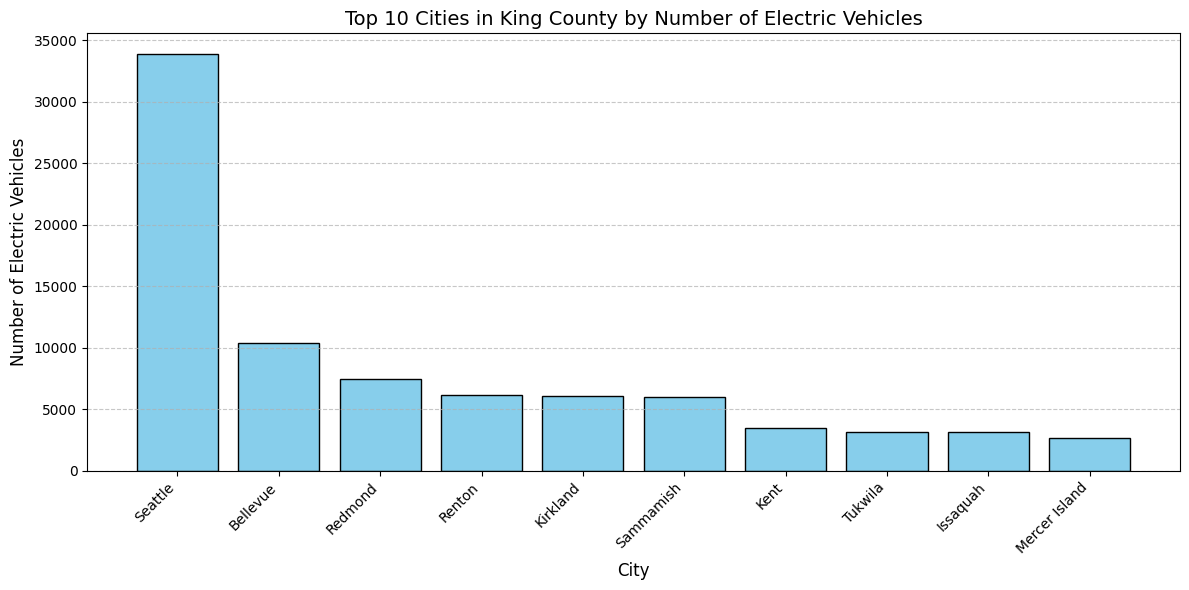

In [59]:
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_ten_cities_king_county['City'], top_ten_cities_king_county['EV_Count'], color='skyblue', edgecolor='black')
plt.title('Top 10 Cities in King County by Number of Electric Vehicles', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Electric Vehicles', fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Use tight layout for readability
plt.tight_layout()

# Show the bar chart
plt.show()

**QUESTION 1**: Use Spark SQL to find the number of electric vehicles in each city for a specific county of your choice.

**Using an SQL query, I found the number of electric vehicles for each of the 46 cities in King County.**  Seattle is the top city in King County (and in the entire dataset, as determined by an earlier analysis), with 33,854 EVs.  Bellevue is a distant second, with 10,414 EVs, while Gold Bar's 2 EVs represent the lowest number.  Since King County consists of 61 cities and neighborhoods, some regions of King County do not include any EVs and are not part of this analysis. 

After running the SQL query, I used .count() to determine the number of cities with EVs in King County and .show(46) to show all rows of this data.  I used .head(10) to display the top ten cities in King County by EV number.  I ran .toPandas() to convert the Spark DataFrame to Pandas in order to create a visualization. 

**The bar chart above displays the top ten cities in King County by EV number.** I used matplotlib to create the bar chart; see my code for more details.  When converting my DataFrame, I incorporated .limit(10) so that only the top ten cities would be displayed. 

**COMPARISON TO PANDAS**: 

1) Differences: Spark SQL is declarative in its structure, making its queries more intuitive to write and read than those of an imperative method like Pandas.  Declarative programming only requires the programmer to specify what needs to be done rather than how to do it.  

For this query, I was able to straightforwardly SELECT City FROM [the dataset] WHERE County = 'King,' and so on with GROUP BY and ORDER BY.  If I had been using Pandas, I would have had to use less intuitive functions like .reset_index.  As an example of the difference between the two, see the code below that would be used to select King County in Spark versus Pandas: 

Spark (SQL): WHERE County = 'King County'

Pandas (Python): df[df['County'] == 'King County'] 

2) Advantages and Disadvantages: I am about equally familiar with SQL and Python, yet I find SQL to be the more intuitive language.  Since Spark allows me to write SQL queries, this is an advantage.  I also find SQL code more readable, as described in the next question.  PySpark is also superior in handling large data sets, though this likely doesn't make much difference with a dataset containing ~200,000 rows (it would be more significant for a dataset containing millions or billions of rows).

One disadvantage of using Spark to analyze this dataset was that I needed to convert the DataFrame to Pandas form before creating a visualization.  The piece of code involved, which is below, was a bit tricky to figure out: 
top_ten_cities_king_county = king_county_city_ev_counts.limit(10).toPandas()

Because top_ten_cities_king_county was not in itself a DataFrame, I needed to instead use king_county_ev_counts (my initial Spark DataFrame), set the limit to the top ten, and convert to Pandas.  

3) Ease of Use and Readability: In spite of the extra step involved in creating a visualization, I found PySpark easier to use and more readable than Pandas for this task.  Looking back at my SQL query, I can easily remember what each piece of the code means.  "SELECT City, Count(*)" reads more like an English sentence than its equivalent in Pandas would.  This readability is helpful when coming back to look at the code after a break, and it would also be useful if multiple people on a team were working with the same code. 



**Beginning of Question 2**: Calculate the average electric range for each make, considering only Battery Electric Vehicles (BEVs), and order the results from highest to lowest average range.

In [60]:
# Calculate the average electric range for BEVs
# Exclude those with a zero value
# Group by make, order by electric range, descending
query = """
SELECT 
    Make, 
    AVG(`Electric Range`) AS Average_Electric_Range
FROM 
    ev_table
WHERE 
    `Electric Vehicle Type` = 'Battery Electric Vehicle (BEV)'
    AND `Electric Range` > 0
GROUP BY 
    Make
ORDER BY 
    Average_Electric_Range DESC;
"""

In [61]:
# Execute the query
average_range_by_make = spark.sql(query)

# Show the results
average_range_by_make.show()

+--------------+----------------------+
|          Make|Average_Electric_Range|
+--------------+----------------------+
|         TESLA|    241.01208939791616|
|     CHEVROLET|     236.8823649754501|
|        JAGUAR|                 234.0|
|      POLESTAR|                 233.0|
|       HYUNDAI|    219.77528089887642|
|          AUDI|    208.74277854195324|
|       PORSCHE|    198.51315789473685|
|           KIA|     181.3282188125417|
|          MINI|                 110.0|
|    VOLKSWAGEN|    107.16869728209934|
|        NISSAN|     105.0505387622771|
|        TOYOTA|    102.57142857142857|
|           BMW|    100.95675675675676|
|         TH!NK|                 100.0|
| MERCEDES-BENZ|                  87.0|
|          FIAT|     85.62692307692308|
|          FORD|      78.5798319327731|
|    MITSUBISHI|     61.94736842105263|
|         SMART|     61.86938775510204|
|AZURE DYNAMICS|                  56.0|
+--------------+----------------------+



In [62]:
# Count the number of BEV makes with electric range listed
# Note that there are 20 unique makes, which means all data was printed above
bev_range_count = average_range_by_make.count()
print(bev_range_count)

20


In [63]:
# Convert to a Pandas DataFrame in order to make a visualization
# Limit 10 to display only the top ten makes by electric range
top_ten_bev_range = average_range_by_make.limit(10).toPandas()

In [64]:
print(top_ten_bev_range)

         Make  Average_Electric_Range
0       TESLA              241.012089
1   CHEVROLET              236.882365
2      JAGUAR              234.000000
3    POLESTAR              233.000000
4     HYUNDAI              219.775281
5        AUDI              208.742779
6     PORSCHE              198.513158
7         KIA              181.328219
8        MINI              110.000000
9  VOLKSWAGEN              107.168697


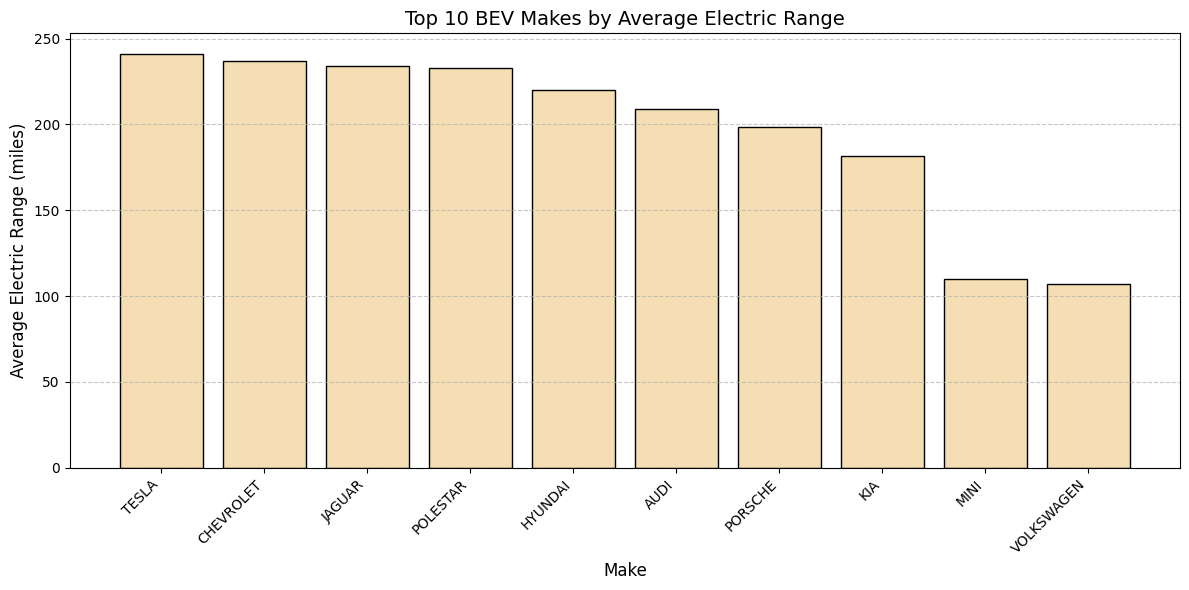

In [65]:
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_ten_bev_range['Make'], top_ten_bev_range['Average_Electric_Range'], color='wheat', edgecolor='black')
plt.title('Top 10 BEV Makes by Average Electric Range', fontsize=14)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Average Electric Range (miles)', fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Use tight layout for readability
plt.tight_layout() 

# Show the bar chart
plt.show()

**QUESTION 2**: Calculate the average electric range for each make, considering only Battery Electric Vehicles (BEVs), and order the results from highest to lowest average range.

**I used a Spark SQL query to select make and average electric range for BEVs with a listed electric range greater than zero.** I grouped the data by make and ordered it by electric range, descending.  I used .show() to print the data, which displayed 20 rows.  I confirmed that there were only 20 unique makes by running .count().

The top 4 makes have very similar electric ranges, ranging from 233 miles (Polestar, #4) to 241 miles (Tesla, #1).  Although Mini and Volkswagen are within the top 10 list, their ranges (110 and 107 miles, respectively) are less than half that of Tesla.  Electric range continues to drop off steeply for the remaining 10 vehicles in the list of all 20 makes, with Azure Dynamics having an average range of only 56 miles.  

**The bar chart above shows the top 10 Battery Electric Vehicle makes by electric range.** I used .toPandas() to convert my data to a Pandas DataFrame in order to create the visualization and .limit(10) to include only the top ten makes.  I used matplotlib to create the bar chart.

**COMPARISON TO PANDAS**: 

1. Differences: Again, I found Spark SQL to be a more intuitive choice than Pandas for this analysis.  The WHERE function allowed me to filter the data to only include BEVs with an electric range greater than zero.  A Pandas analysis would have required multiple steps: filtering, grouping, averaging, and sorting.  In contrast, a single SQL query accomplished all of these tasks at once.

As an example, here is the code to filter by BEVs with nonzero electric range in both Spark and Pandas: 

Spark (SQL): WHERE `Electric Vehicle Type` = 'Battery Electric Vehicle (BEV)' AND `Electric Range` > 0

Pandas (Python): filtered_df = df[(df['Electric Vehicle Type'] == 'Battery Electric Vehicle') & (df['Electric Range'] > 0)]

The Spark code is more concise, follows an easily understandable logical sequence, and incorporates plain English phrases like "WHERE."

2) Advantages and Disadvantages: Spark SQL's intuitive syntax and flow constitute an advantage. A single query encompasses many logical steps, which would likely need to be broken into discrete steps in Pandas.  Even if many of these steps could be combined into a single Pandas operation, the operation would be complex and unwieldy.

On the other hand, debugging in SQL can be more difficult because all of the logic is contained in a single block.  As a result, it is impossible to run a single piece of the code at a time in Jupyter Notebook (unless elements of the query are built out step by step).  Since operations are broken into steps in Pandas, debugging can be easier.  As an example in this code, I initially didn't realize that columns should be enclosed in backticks rather than quotation marks.  Figuring out that this issue was causing an error took me some time due to the complexity of the SQL query. 

3) Ease of Use and Readability: I found Spark SQL to be more readable than the equivalent Pandas code would have been.  I can follow the logical sequence more easily when it is contained within a single query rather than split into multiple Pandas operations.  The use of phrases like SELECT, FROM, WHERE, GROUP BY, and ORDER BY create a narrative framework that feels more similar to the English language than Python does.  The declarative nature of SQL also contributes to this perception, as I am able to give the program a direct command. 



**Beginning of Question 3**: Analyze the distribution of electric vehicles across legislative districts, and identify the
top 5 districts with the highest EV adoption.

In [66]:
# Return legislative districts and EV counts
# Omit null values
# Group by legislative district; order by descending EV count
query = """
SELECT 
    `Legislative District` AS District, 
    COUNT(*) AS EV_Count
FROM 
    ev_table
WHERE 
    `Legislative District` IS NOT NULL
GROUP BY 
    `Legislative District`
ORDER BY 
    EV_Count DESC;
"""

In [67]:
# Display the table
legislative_districts = spark.sql(query)
legislative_districts.show()

+--------+--------+
|District|EV_Count|
+--------+--------+
|      41|   13196|
|      45|   12192|
|      48|   11348|
|       1|    9099|
|      11|    8955|
|       5|    8954|
|      36|    8404|
|      46|    7848|
|      43|    7341|
|      37|    6112|
|      34|    6063|
|      44|    5750|
|      18|    5658|
|      21|    5315|
|      22|    5249|
|      32|    5111|
|      23|    4506|
|      40|    4396|
|      26|    4197|
|      47|    3946|
+--------+--------+
only showing top 20 rows



In [68]:
# Find the number of legislative districts
num_legislative_districts = legislative_districts.count()
print(num_legislative_districts)

49


In [69]:
# Show all 49 rows of data
legislative_districts.show(49)

+--------+--------+
|District|EV_Count|
+--------+--------+
|      41|   13196|
|      45|   12192|
|      48|   11348|
|       1|    9099|
|      11|    8955|
|       5|    8954|
|      36|    8404|
|      46|    7848|
|      43|    7341|
|      37|    6112|
|      34|    6063|
|      44|    5750|
|      18|    5658|
|      21|    5315|
|      22|    5249|
|      32|    5111|
|      23|    4506|
|      40|    4396|
|      26|    4197|
|      47|    3946|
|      33|    3842|
|      31|    3796|
|      10|    3682|
|      17|    3559|
|      39|    3149|
|      35|    3011|
|      42|    3010|
|      49|    2988|
|      27|    2939|
|      24|    2823|
|      28|    2779|
|      30|    2571|
|       2|    2497|
|      25|    2280|
|      38|    2237|
|       8|    2227|
|       6|    2103|
|      12|    2002|
|      20|    1978|
|       4|    1874|
|      13|    1547|
|      29|    1529|
|      14|    1414|
|      19|    1279|
|       9|    1223|
|      16|    1115|
|       3|    1060|


In [70]:
# Re-run the district query, this time limiting output to the top 5 legislative districts
query = """
SELECT 
    `Legislative District` AS District, 
    COUNT(*) AS EV_Count
FROM 
    ev_table
WHERE 
    `Legislative District` IS NOT NULL
GROUP BY 
    `Legislative District`
ORDER BY 
    EV_Count DESC
LIMIT 5;
"""

In [71]:
# Show the top 5 legislative districts by EV count
top_districts = spark.sql(query)
top_districts.show()

+--------+--------+
|District|EV_Count|
+--------+--------+
|      41|   13196|
|      45|   12192|
|      48|   11348|
|       1|    9099|
|      11|    8955|
+--------+--------+



In [72]:
# Convert the Spark DataFrame to a Pandas DataFrame
top_districts_df = top_districts.toPandas()

In [73]:
# Show the first few rows
top_districts_df.head()

,District,EV_Count
0,41,13196
1,45,12192
2,48,11348
3,1,9099
4,11,8955


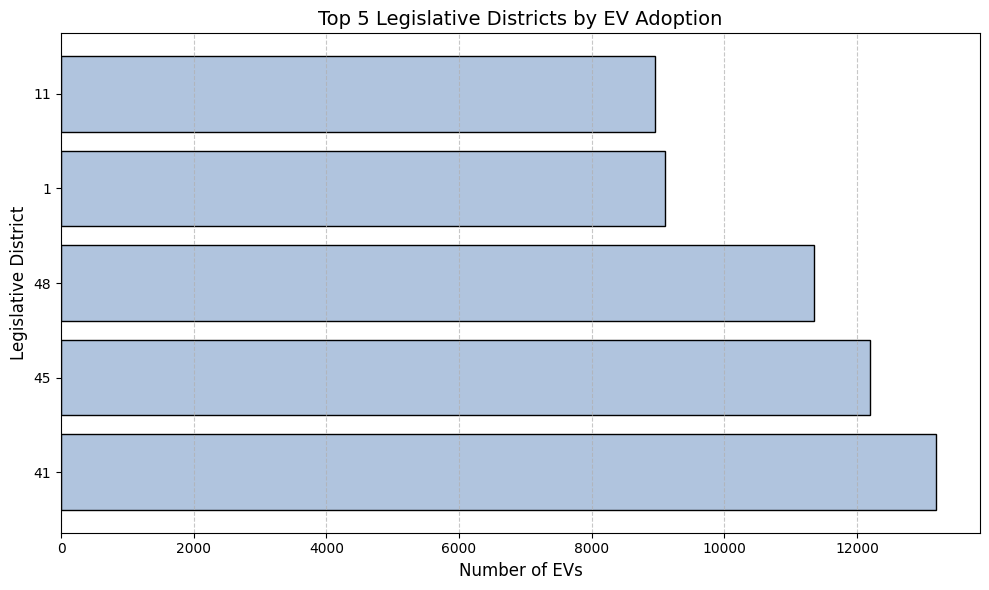

In [74]:
# Convert district values to strings
top_districts_df['District'] = top_districts_df['District'].astype(str)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_districts_df['District'], top_districts_df['EV_Count'], color='lightsteelblue', edgecolor='black')
plt.title('Top 5 Legislative Districts by EV Adoption', fontsize=14)
plt.xlabel('Number of EVs', fontsize=12)
plt.ylabel('Legislative District', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the bar chart
plt.tight_layout()
plt.show()

**QUESTION 3**: Analyze the distribution of electric vehicles across legislative districts, and identify the top 5 districts with the highest EV adoption.

**All of Washington's 49 legislative districts have adopted electric vehicles.**  District 41 has 13,196 vehicles, or 6.3% of all EVs in Washington.  District 41 covers all of Mercer Island and Newcastle, with portions of Bellevue, Renton, Issaquah, and Sammamish.  District 15 has the fewest EVs, with 559 vehicles.  

**The top 5 legislative districts by EV number are as follows:** District 41 (13,196), District 45 (12,192), District 48 (11,348), District 1 (9.099), and District 11 (8,955).

I used an SQL query to select legislative districts and EV counts, omit null values, and group by legislative district with descending EV count.  An earlier analysis had showed that the only null values were those EVs outside of Washington, so all 209,720 vehicles within WA had a listed district.  I ran .count() to find the number of legislative districts and .show(49) to display the complete table.  

I then reran the same SQL query, this time using LIMIT 5 to return only the top 5 districts by EV number.  I used .toPandas() to convert this data to a Pandas DataFrame before creating a visualization. 

**The horizontal bar graph above displays the top 5 legislative districts based on EV numbers.**  I used .astype(str) to convert legislative district values to string format so that they would not be grouped together numerically.  Please see my bar graph code for more details. 

**COMPARISON TO PANDAS**:

1. Differences: This analysis was less complex and more straightforward using Spark SQL than it would have been using Pandas.  In Pandas, several different DataFrames would have been used to filter data (eliminate null values), group data, and sort data.  In Spark, a single query accomplished all of these tasks.  

For comparison, see the equivalent code to filter null data in Spark versus Pandas: 

Spark (SQL): WHERE `Legislative District` IS NOT NULL

Pandas (Python): filtered_df = df[df['Legislative District'].notna()]

The Spark SQL version is more intuitive and preserves the flow of the query.  

2. Advantages and Disadvantages:  The only minor disadvantage of using Spark is the need to convert to Pandas before visualizing.  However, I handled this more concisely here than I had in Questions 1 and 2.  I included LIMIT 5 in my SQL query so that the initial query would already contain only the top 5 legislative districts.  This allowed me to convert my data to Pandas in a single step:
   
    top_districts_df = top_districts.toPandas()
   
and eliminated the need for .limit(5) while making this conversion.

Again, the intuitive flow of SQL constitutes a major advantage.  A single query, organized in declarative sentence format, was able to count, filter, group, sort, and order data, as well as restrict output to the top five legislative districts.  The same data might have gone through 4-5 discrete Pandas operations to produce the same result.  

3. Ease of Use and Readability: For this analysis, Spark SQL was superior in terms of ease of use and readability.  The need to break Pandas code into several DataFrames (e.g., filtered_df, shown above) and use less intuitive functions like .notna() and .size() increases mental processing demands when working with Pandas.  With Spark, familiar words like WHERE and IS NOT NULL decrease mental load and facilitate a smoother programming experience.  Similarly, the code is more readable for others who may be viewing it for the first time. 

**Beginning of Question 4**: Calculate the average Base MSRP for each Electric Vehicle Type. Display the results sorted from highest to lowest average MSRP.

In [75]:
# Return EV type and average MSRP
# Exclude zero and null values for MSRP
# Group by EV Type and order by average MSRP, descending
query = """
SELECT 
    `Electric Vehicle Type` AS EV_Type, 
    AVG(`Base MSRP`) AS Average_MSRP
FROM 
    ev_table
WHERE 
    `Base MSRP` IS NOT NULL 
    AND `Base MSRP` > 0
GROUP BY 
    `Electric Vehicle Type`
ORDER BY 
    Average_MSRP DESC;
"""

In [76]:
# Show the SQL query data in table format
vehicle_type_msrp = spark.sql(query)
vehicle_type_msrp.show()

+--------------------+------------------+
|             EV_Type|      Average_MSRP|
+--------------------+------------------+
|Battery Electric ...| 59648.73326959847|
|Plug-in Hybrid El...|52482.025472473295|
+--------------------+------------------+



In [77]:
# Convert the data to Pandas before creating a visualization
df_vehicle_type_msrp = vehicle_type_msrp.toPandas()

In [78]:
# Confirm the data has been correctly converted to a Pandas DataFrame
print(df_vehicle_type_msrp)

                                  EV_Type  Average_MSRP
0          Battery Electric Vehicle (BEV)  59648.733270
1  Plug-in Hybrid Electric Vehicle (PHEV)  52482.025472


In [79]:
# Round the 'Average_MSRP' column to 2 decimal places
df_vehicle_type_msrp = df_vehicle_type_msrp.round({'Average_MSRP': 2})

# Show the rounded values
print(df_vehicle_type_msrp)

                                  EV_Type  Average_MSRP
0          Battery Electric Vehicle (BEV)      59648.73
1  Plug-in Hybrid Electric Vehicle (PHEV)      52482.03


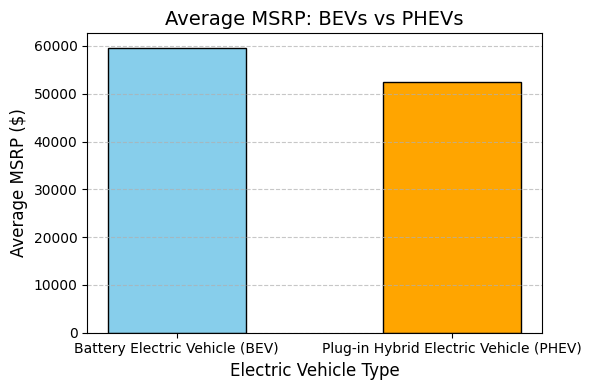

In [80]:
# Set figure size and the width of the bars
plt.figure(figsize=(6, 4))
bar_width = 0.5  

# Define data, bar width, and colors
plt.bar(
    df_vehicle_type_msrp['EV_Type'], 
    df_vehicle_type_msrp['Average_MSRP'], 
    width=bar_width,  
    color=['skyblue', 'orange'], 
    edgecolor='black'
)

# Add titles and labels
plt.title('Average MSRP: BEVs vs PHEVs', fontsize=14)
plt.xlabel('Electric Vehicle Type', fontsize=12)
plt.ylabel('Average MSRP ($)', fontsize=12)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar chart
plt.tight_layout()
plt.show()

**QUESTION 4**: Calculate the average Base MSRP for each Electric Vehicle Type. Display the results sorted from highest to lowest average MSRP.

**The average MSRP for Battery Electric Vehicles (BEVs) is `$59648.73`, while the average MSRP for Plug-In Hybrid Electric Vehicles (PHEVs) is `$52482.03`.** On average, the sticker price of a PHEV is 88.0% that of a BEV.  These averages exclude zero and null values for MSRP.  Of note, an earlier analysis found that the number of vehicles with nonzero MSRP is 3,309, which represents only 1.6% of the entire dataset.  This large majority of missing values necessitates caution when drawing conclusions from the present analysis.   

I ran a Spark SQL query to return EV Type and Average MSRP, exclude zero and null MSRP values, and display the results in order of descending MSRP.  The "Electric Vehicle Type" column does not contain any zero or null values, so I did not need to include a WHERE condition for EV Type.  I used .show() to display the table, which was shown in its entirety due to its short size.  I rounded to the nearest cent by using .round(). 

**The comparison between Base MSRP for BEVs and PHEVs is shown in the bar graph above.**  Before using matplotlib to create the visualization, I used .toPandas() to convert the DataFrame.  I adjusted the bar width to avoid overly wide bars due to there only being two values.  Please see my bar chart code for more details.  

**COMPARISON TO PANDAS**: 

1) Differences: Leveraging Spark SQL capabilities allowed for a more concise, streamlined analysis than Pandas would have.  In Pandas, several DataFrames would have been used to eliminate zero and null MSRP values, while a separate .mean() function would have been necessary to find the average MSRP.  In Spark SQL, filtering was accomplished by passing two conditions within WHERE, and average was calculated with the aggregate function AVG as part of the initial SELECT statement.

See for comparison: 

Spark (SQL): WHERE `Base MSRP` IS NOT NULL AND `Base MSRP` > 0

Pandas (Python): filtered_df = df[(df['Base MSRP'] > 0) & (df['Base MSRP'].notna())]

The Pandas method incorporates many levels of parentheses and brackets, as well as the repeating usage of 'df,' in order to filter data according to two conditions and combine these conditions into a new DataFrame.  These elements diminish readability and make the logic more complicated to follow.  The Spark method, on the other hand, passes both of these conditions in plain English as part of a compound WHERE statement. 

2) Advantages and Disadvantages: Spark SQL provided an advantage in filtering, grouping, and sorting this data.  It also allowed for average MSRP to be defined in the initial SELECT statement through the use of AVG.  In addition, ORDER BY provides a straightforward way of ensuring data is displayed in descending order, while the equivalent .sort_values() in Pandas is more complex.

One limitation of Spark SQL is its unsuitability for extensive programming logic involving, for example, loops and recursions.  Python is better equipped for that type of task, though PySpark could theoretically be used.  However, such complex logic does not apply to the present analysis (or to any of the EV analyses).  

3) Ease of Use and Readability: Once again, Spark is superior to Pandas in terms of readability and ease of use.  The difference in filtering method, shown earlier, provides one example of this.  Another is the logic used for sorting: in Pandas, a double negative is required to sort in descending order:
   
    Pandas: .sort_values(ascending=False)
   
while in SQL, this can be accomplished through a single positive command:

    `SQL: ORDER BY Average_MSRP DESC`.

This flexibility in syntax makes Spark SQL significantly more readable and allows for a smoother coding experience. 

**Beginning of Question 5**: Identify the top 10 ZIP codes with the highest number of electric vehicles. Include the
count and percentage of total vehicles for each ZIP code.

In [81]:
# Return ZIP code, EV count, and percentage of total vehicles rounded to two decimal places
# Group by postal code, order by descending EV count
# Return only the top 10 ZIP codes by EV count
query = """
SELECT 
    `Postal Code` AS Zip_Code, 
    COUNT(*) AS EV_Count,
    ROUND(COUNT(*) * 100.0 / 210165, 2) AS Percentage_Of_Total
FROM 
    ev_table
GROUP BY 
    `Postal Code`
ORDER BY 
    EV_Count DESC
LIMIT 10
"""

In [82]:
# Show the table of top 10 ZIP codes
top_zip_codes = spark.sql(query)
top_zip_codes.show()

+--------+--------+-------------------+
|Zip_Code|EV_Count|Percentage_Of_Total|
+--------+--------+-------------------+
|   98052|    5256|               2.50|
|   98012|    3959|               1.88|
|   98033|    3486|               1.66|
|   98006|    3314|               1.58|
|   98188|    3229|               1.54|
|   98004|    3209|               1.53|
|   98115|    3103|               1.48|
|   98074|    2863|               1.36|
|   98072|    2779|               1.32|
|   98034|    2675|               1.27|
+--------+--------+-------------------+



In [83]:
# Convert to a Pandas DataFrame to make the data compatible with matplotlib
df_top_zip_codes = top_zip_codes.toPandas()

In [84]:
# Verify that the table is displayed as expected 
top_zip_codes.show()

+--------+--------+-------------------+
|Zip_Code|EV_Count|Percentage_Of_Total|
+--------+--------+-------------------+
|   98052|    5256|               2.50|
|   98012|    3959|               1.88|
|   98033|    3486|               1.66|
|   98006|    3314|               1.58|
|   98188|    3229|               1.54|
|   98004|    3209|               1.53|
|   98115|    3103|               1.48|
|   98074|    2863|               1.36|
|   98072|    2779|               1.32|
|   98034|    2675|               1.27|
+--------+--------+-------------------+



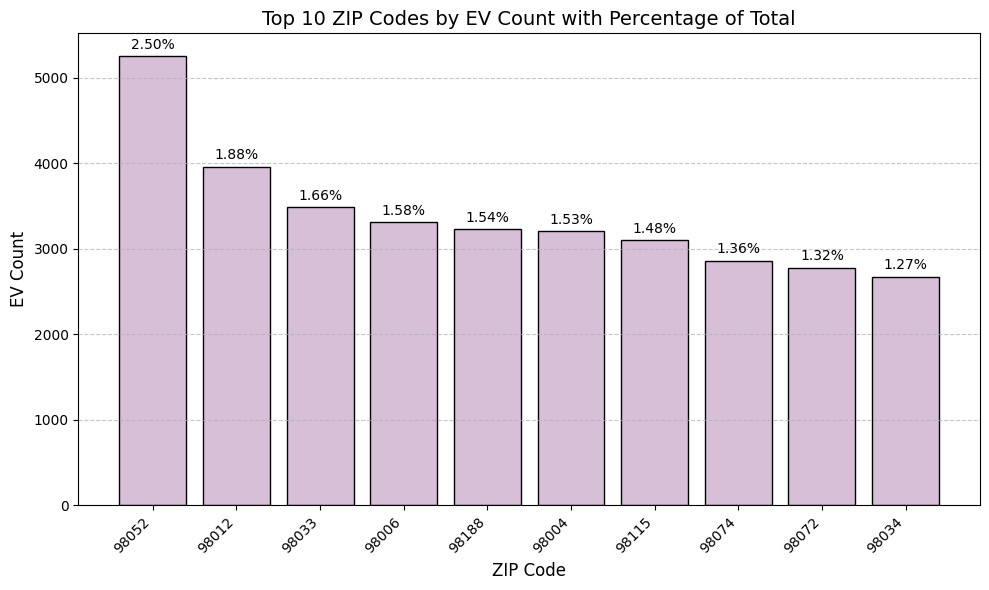

In [85]:
import pandas as pd

# Data for the bar graph
data = {
    "Zip_Code": ["98052", "98012", "98033", "98006", "98188", "98004", "98115", "98074", "98072", "98034"],
    "EV_Count": [5256, 3959, 3486, 3314, 3229, 3209, 3103, 2863, 2779, 2675],
    "Percentage_Of_Total": [2.50, 1.88, 1.66, 1.58, 1.54, 1.53, 1.48, 1.36, 1.32, 1.27]
}

# Create a Pandas DataFrame from the data
df_top_zip_codes = pd.DataFrame(data)

# Create a bar graph for EV Count by ZIP Code
plt.figure(figsize=(10, 6))
bars = plt.bar(
    df_top_zip_codes["Zip_Code"], 
    df_top_zip_codes["EV_Count"], 
    color="thistle", 
    edgecolor="black"
)

# Display percentages above each bar
for bar, percentage in zip(bars, df_top_zip_codes["Percentage_Of_Total"]):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 50,                                         # Display a bit above each bar
        f"{percentage:.2f}%",                                # Format as a percentage
        ha="center", 
        va="bottom", 
        fontsize=10
    )

# Create a title, axes, and gridlines
plt.title("Top 10 ZIP Codes by EV Count with Percentage of Total", fontsize=14)
plt.xlabel("ZIP Code", fontsize=12)
plt.ylabel("EV Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the bar graph
plt.tight_layout()
plt.show()


**QUESTION 5**: Identify the top 10 ZIP codes with the highest number of electric vehicles. Include the count and percentage of total vehicles for each ZIP code.

**I used a Spark SQL query to identify the top 10 ZIP codes, along with the corresponding number of EVs and percentage of total vehicles.** I selected postal code, EV count (using `COUNT(*)`), and percentage of total vehicles.  To calculate the percentage of total rounded to two decimal places, I used `ROUND(COUNT(*) * 100.0 / 210165 AS Percentage_Of_Total`, with 210,165 being the total number of EVs in the dataset.  I grouped by postal code, ordered by descending EV count, and used `LIMIT 10` to capture only the top 10 ZIP codes. 

**The top ZIP code by EV count is 98052**, which is the ZIP code for Redmond, Washington.  Redmond is known as a technology hub, which might contribute to its residents being early adopters of EV technology.  This ZIP code accounts for 2.50% of all EVs in the dataset, while the next ZIP code, 98012 in Snohomish County, accounts for 1.88%.  

After writing the SQL query, I used .show() to display the table and .toPandas to convert the data into a Pandas DataFrame.  I then used matplotlib to create a visualization.  Displaying three variables (ZIP code, EV count, and percentage of total) made the bar graph code more complex.  I chose to plot ZIP Code on the x-axis and EV count on the y-axis, while displaying percentages above each bar.  

**The bar graph above depicts the top 10 ZIP codes, EV counts, and percentages of total vehicles in visual form.**  I manually listed the data rather than working from an already established DataFrame while creating the visualization, since I found that this strategy allowed me to display all three variables in a more readable graph.  For more details, please see the bar graph code and my comments. 

**COMPARISON TO PANDAS**:

1) Differences: This was a more complex analysis than those in Questions 1-4, as it asked for the percentage of total vehicles in addition to the main query about ZIP codes.  Spark SQL allows for a single compound query to incorporate all elements of the analysis, while Pandas breaks the analysis into a series of individual steps.  Though I prefer the overall structure and syntax of SQL, I found it challenging to map the "big picture" needed to organize a query of this complexity.  For this particular analysis, I might have found it easier to work through one step at a time in Pandas.

2) Advantages and Disadvantages:  I chose to calculate the percentage of total vehicles using the value I already knew represented total vehicles: 210,165.  In Pandas, I could have easily referred to an earlier DataFrame (e.g., total_ev_count) within my analysis rather than use the numeric value.  In SQL, however, doing this would have been unwieldy due to the necessity of using the OVER function.  See the sample code in both languages for comparison:

Spark (SQL): `(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER ()) AS Percentage_of_Total`

Pandas (Python): `zip_counts["Percentage_Of_Total"] = (zip_counts["EV_Count"] / total_ev_count) * 100`

Unlike in earlier analyses, Pandas presents an advantage in organizing this task.  The ability to break sub-tasks into discrete lines of code and test them one at a time in Jupyter Notebook is another advantage of Pandas, as noted earlier.  In addition, Pandas can be faster in handling small datasets since it processes data in-memory without the overhead of distributed computing.  However, the difference in speed would be negligible for a quick task like this one.  

As highlighted in earlier analyses, Spark SQL's syntax provides a fluid and intuitive coding experience. Despite encountering some challenges in the present analysis, this remains a significant advantage.  

3) Readability: The readability of Pandas versus Spark SQL largely depends on personal preference. For the "percentage of total" calculation, the Pandas version appears more readable due to fewer parentheses, clear category labels (zip_counts and total_ev_counts), and the absence of functions like SUM, COUNT, and OVER. However, in this analysis, I simplified the calculation by directly using the total vehicle count (210,165). With this simplification, the readability of Pandas and Spark SQL becomes comparable.

For the overall query, SQL reads more like a complete paragraph, while Python breaks the logic into discrete, step-by-step operations. For multi-component analyses like this one, some might prefer Pandas’ explicit step-wise structure, while others may favor SQL’s consistent and concise syntax with familiar constructs like SELECT, FROM, WHERE, GROUP BY, and ORDER BY. Personally, I find the Spark SQL version more readable for this analysis, though I recognize that perspectives may vary, especially as they apply to this task. 